In [87]:
import gymnasium as gym
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt

# parameters

In [88]:
env = gym.make("Taxi-v3", render_mode="rgb_array")

discount_factor = 0.9
training = True
episodes = 10000

if training:
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
else:
    f = open('q_table.pkl', 'rb')
    q_table = pickle.load(f)
    f.close()

# training q table

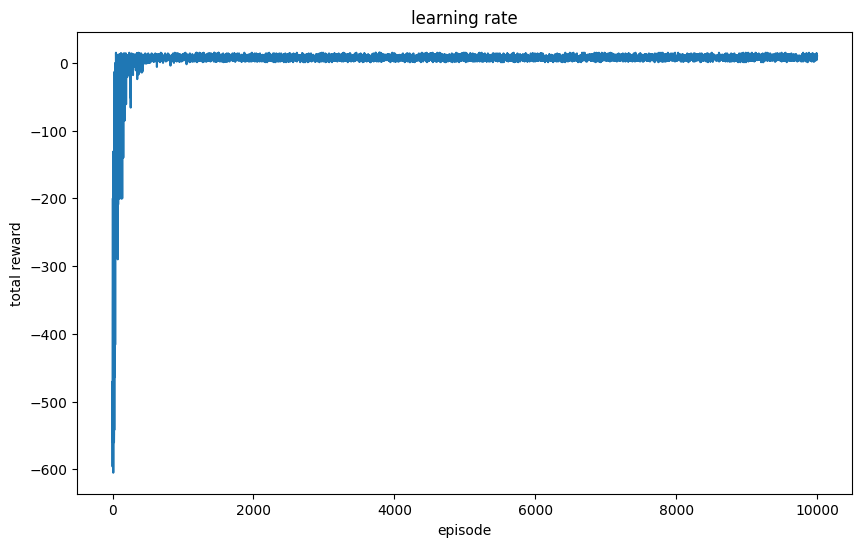

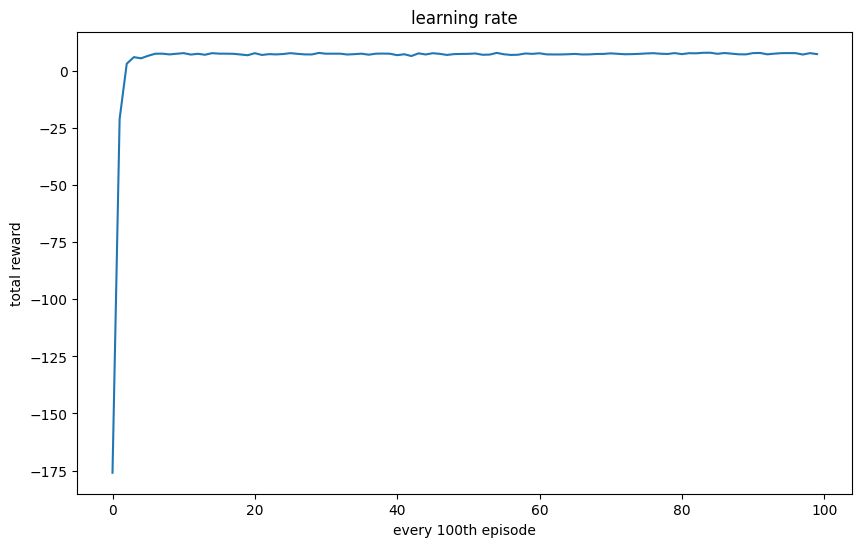

In [89]:
if training:
    episode_rewards = []
    for episode in range(episodes): 
        state, _ = env.reset()
        terminated = False
        truncated = False
        total_reward = 0
        while (not terminated and not truncated):
            action = np.argmax(q_table[state,:])
            
            new_state, reward, terminated, truncated, info = env.step(action)
            total_reward += reward  
            
            # bellman equation
            q_table[state,action] = (q_table[state,action] 
                                     + reward 
                                     + discount_factor * np.max(q_table[new_state,:]) 
                                     - q_table[state,action])
            state = new_state
        episode_rewards.append(total_reward)
    env.close()
    
    plt.figure(figsize=(10, 6))
    plt.plot(episode_rewards)
    plt.xlabel('episode')
    plt.ylabel('total reward')
    plt.title('learning rate')
    plt.savefig('learning_curve.png')
    
    window_size = 100
    averaged_rewards = [
    np.mean(episode_rewards[i:i + window_size])
    for i in range(0, len(episode_rewards), window_size)
    ]
    
    plt.figure(figsize=(10, 6))
    plt.plot(averaged_rewards)
    plt.xlabel('every 100th episode')
    plt.ylabel('total reward')
    plt.title('learning rate')
    plt.savefig('learning_curve_100th.png')
    
    
    
    f = open('q_table.pkl', 'wb')
    pickle.dump(q_table, f)
    f.close()

In [90]:
print(q_table)

[[  0.           0.           0.           0.           0.
    0.        ]
 [ -6.12579511  -5.6953279   -6.12579511  -5.6953279    1.62261467
  -10.        ]
 [ -4.0951      -4.0951      -4.68559     -4.0951       7.7147
  -10.        ]
 ...
 [ -4.0951      -3.439       -4.0951      -3.439      -10.
  -10.        ]
 [ -5.217031    -4.68559     -4.68559     -4.68559    -10.
  -10.        ]
 [ -1.9         -1.9         -1.9         -1.         -10.
  -10.        ]]


# game with learned q table

In [91]:
state, _ = env.reset()
terminated = False
truncated = False
rewards = 0
while (not terminated and not truncated):
    action = np.argmax(q_table[state,:])
    state, reward, terminated, truncated, info = env.step(action)
    rewards+= reward
    
    cv2.imshow('Bolciarz the game', cv2.cvtColor(env.render(), cv2.COLOR_RGB2BGR))
    cv2.waitKey(250)
    if cv2.getWindowProperty('Bolciarz the game', cv2.WND_PROP_VISIBLE) < 1:
        break
cv2.destroyAllWindows()
print(f"total reward: {rewards}")

total reward: 8
